## Fixed Data:

In [1]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import requests
import pandas as pd
from fredapi import Fred

API_KEY = '1vGb0FOsg2hEIGrEhpueLCcWd1Y'
FRED_API_KEY = 'b13a905b98b5dfc1f3910d6a0d875ae3'

rootUrl = 'https://api.glassnode.com'

symbolList = ['BTC', 'ETH', 'LTC', 'AAVE', 'ABT', 'AMPL', 'ANT', 'ARMOR', 'BADGER', 'BAL', 'BAND', 'BAT', 'BIX', 'BNT', 'BOND', 'BRD', 'BUSD', 'BZRX', 'CELR', 'CHSB', 'CND', 'COMP', 'CREAM', 'CRO', 'CRV', 'CVC', 'CVP', 'DAI', 'DDX', 'DENT', 'DGX', 'DHT', 'DMG', 'DODO', 'DOUGH', 'DRGN', 'ELF', 'ENG', 'ENJ', 'EURS', 'FET', 'FTT', 'FUN', 'GNO', 'GUSD', 'HEGIC', 'HOT', 'HPT', 'HT', 'HUSD', 'INDEX', 'KCS', 'LAMB', 'LBA', 'LDO', 'LEO', 'LINK', 'LOOM', 'LRC', 'MANA', 'MATIC',
              'MCB', 'MCO', 'MFT', 'MIR', 'MKR', 'MLN', 'MTA', 'MTL', 'MX', 'NDX', 'NEXO', 'NFTX', 'NMR', 'Nsure', 'OCEAN', 'OKB', 'OMG', 'PAY', 'PERP', 'PICKLE', 'PNK', 'PNT', 'POLY', 'POWR', 'PPT', 'QASH', 'QKC', 'QNT', 'RDN', 'REN', 'REP', 'RLC', 'ROOK', 'RPL', 'RSR', 'SAI', 'SAN', 'SNT', 'SNX', 'STAKE', 'STORJ', 'sUSD', 'SUSHI', 'TEL', 'TOP', 'UBT', 'UMA', 'UNI', 'USDC', 'USDK', 'USDP', 'USDT', 'UTK', 'VERI', 'WaBi', 'WAX', 'WBTC', 'WETH', 'wNXM', 'WTC', 'YAM', 'YFI', 'ZRX']

symbolListShort = ['BTC', 'ETH', 'LTC']

endPoints = {
    'Price': '/v1/metrics/market/price_usd_close',
    'MarketCap': '/v1/metrics/market/marketcap_usd',
    'TransactionCount': '/v1/metrics/transactions/count',
    'ActiveAddress': '/v1/metrics/addresses/active_count',
}

## <font color='black'> Federal Interst Rate

In [3]:
fred = Fred(api_key=FRED_API_KEY)
Risk_free_rate = fred.get_series('DGS1MO')
Risk_free_rate = Risk_free_rate.to_frame()
Risk_free_rate = Risk_free_rate.reset_index()
Risk_free_rate = Risk_free_rate.rename(columns={'index':'Date', 0:'RiskFree'})

In [4]:
Risk_free_rate['RiskFree'] = Risk_free_rate['RiskFree'].div(100)
Risk_free_rate

,Date,RiskFree
0,2001-07-31,0.0367
1,2001-08-01,0.0365
2,2001-08-02,0.0365
3,2001-08-03,0.0363
4,2001-08-06,0.0362
...,...,...
5410,2022-04-26,0.0038
5411,2022-04-27,0.0037
5412,2022-04-28,0.0037
5413,2022-04-29,0.0037


In [5]:
Risk_free_rate.to_csv('interest_rate.csv')

## Get Multiple Attributes for Multiple Coins:

In [6]:
### Define a function to pull data according to input values(coin, feature)
### After running this method, it should return pulled data, and also store it in memory named as "coin_feature"

def PullData(coin, feature):
    print(f"Pulling {coin}'s {feature} data")

    # Assemble full request url and get responses:
    reqUrl = rootUrl + endPoints[feature]
    res = requests.get(reqUrl,
                       params={'a': coin, 'api_key': API_KEY, 'i':'1w'})
    data_raw = pd.read_json(res.text, convert_dates=['t'])

    # Rename column "v" according to features
    data = data_raw.rename(columns={"v" : f"{feature}", 't':'Date'})

    # Turn renamed dataframe into a global variable for future using
    name = f"{coin}_{feature}"
    globals()[name] = data

    # Return a dataframe
    return data

In [7]:
### Get all features(listed in endPoints) of all coins(listed in symbolListShort) 

from functools import reduce

for i in symbolList:
    print(f"Start Pulling {i}'s data:")

    # Preparation for merging
    frameName = f"{i}_Frames"
    locals()[frameName] = []

    # Get data
    for j in list(endPoints.keys()):
        locals()[frameName].append(PullData(i, j))

    # Merge to single dataframe
    print('Merging Dataframes...')
    dfName = f"{i}_All"
    # change merge method to outer to ensure not missing any values.
    locals()[dfName] = reduce(lambda  left,right: pd.merge(left,right, on='Date', how='outer'), locals()[frameName]) 
    
    # change merege method to left, to ensure all the records in api stored.
    locals()[dfName] = locals()[dfName].merge(Risk_free_rate,how = 'left').sort_values(by=['Date'])

    print(f"{i} data successfully pulled\n")
print('\nALL DATA SUCCESSFULLY PULLED!')

Start Pulling BTC's data:
Pulling BTC's Price data
Pulling BTC's MarketCap data
Pulling BTC's TransactionCount data
Pulling BTC's ActiveAddress data
Merging Dataframes...
BTC data successfully pulled

Start Pulling ETH's data:
Pulling ETH's Price data
Pulling ETH's MarketCap data
Pulling ETH's TransactionCount data
Pulling ETH's ActiveAddress data
Merging Dataframes...
ETH data successfully pulled

Start Pulling LTC's data:
Pulling LTC's Price data
Pulling LTC's MarketCap data
Pulling LTC's TransactionCount data
Pulling LTC's ActiveAddress data
Merging Dataframes...
LTC data successfully pulled

Start Pulling AAVE's data:
Pulling AAVE's Price data
Pulling AAVE's MarketCap data
Pulling AAVE's TransactionCount data
Pulling AAVE's ActiveAddress data
Merging Dataframes...
AAVE data successfully pulled

Start Pulling ABT's data:
Pulling ABT's Price data
Pulling ABT's MarketCap data
Pulling ABT's TransactionCount data
Pulling ABT's ActiveAddress data
Merging Dataframes...
ABT data successful

Pulling FET's MarketCap data
Pulling FET's TransactionCount data
Pulling FET's ActiveAddress data
Merging Dataframes...
FET data successfully pulled

Start Pulling FTT's data:
Pulling FTT's Price data
Pulling FTT's MarketCap data
Pulling FTT's TransactionCount data
Pulling FTT's ActiveAddress data
Merging Dataframes...
FTT data successfully pulled

Start Pulling FUN's data:
Pulling FUN's Price data
Pulling FUN's MarketCap data
Pulling FUN's TransactionCount data
Pulling FUN's ActiveAddress data
Merging Dataframes...
FUN data successfully pulled

Start Pulling GNO's data:
Pulling GNO's Price data
Pulling GNO's MarketCap data
Pulling GNO's TransactionCount data
Pulling GNO's ActiveAddress data
Merging Dataframes...
GNO data successfully pulled

Start Pulling GUSD's data:
Pulling GUSD's Price data
Pulling GUSD's MarketCap data
Pulling GUSD's TransactionCount data
Pulling GUSD's ActiveAddress data
Merging Dataframes...
GUSD data successfully pulled

Start Pulling HEGIC's data:
Pulling HEGI

Pulling PICKLE's ActiveAddress data
Merging Dataframes...
PICKLE data successfully pulled

Start Pulling PNK's data:
Pulling PNK's Price data
Pulling PNK's MarketCap data
Pulling PNK's TransactionCount data
Pulling PNK's ActiveAddress data
Merging Dataframes...
PNK data successfully pulled

Start Pulling PNT's data:
Pulling PNT's Price data
Pulling PNT's MarketCap data
Pulling PNT's TransactionCount data
Pulling PNT's ActiveAddress data
Merging Dataframes...
PNT data successfully pulled

Start Pulling POLY's data:
Pulling POLY's Price data
Pulling POLY's MarketCap data
Pulling POLY's TransactionCount data
Pulling POLY's ActiveAddress data
Merging Dataframes...
POLY data successfully pulled

Start Pulling POWR's data:
Pulling POWR's Price data
Pulling POWR's MarketCap data
Pulling POWR's TransactionCount data
Pulling POWR's ActiveAddress data
Merging Dataframes...
POWR data successfully pulled

Start Pulling PPT's data:
Pulling PPT's Price data
Pulling PPT's MarketCap data
Pulling PPT's

Merging Dataframes...
WTC data successfully pulled

Start Pulling YAM's data:
Pulling YAM's Price data
Pulling YAM's MarketCap data
Pulling YAM's TransactionCount data
Pulling YAM's ActiveAddress data
Merging Dataframes...
YAM data successfully pulled

Start Pulling YFI's data:
Pulling YFI's Price data
Pulling YFI's MarketCap data
Pulling YFI's TransactionCount data
Pulling YFI's ActiveAddress data
Merging Dataframes...
YFI data successfully pulled

Start Pulling ZRX's data:
Pulling ZRX's Price data
Pulling ZRX's MarketCap data
Pulling ZRX's TransactionCount data
Pulling ZRX's ActiveAddress data
Merging Dataframes...
ZRX data successfully pulled


ALL DATA SUCCESSFULLY PULLED!


In [25]:
locals()[dfName]

,Date,Price,MarketCap,TransactionCount,ActiveAddress,RiskFree
220,2017-08-07,NaN,NaN,0.0,15.0,0.99
221,2017-08-14,NaN,NaN,0.0,25213.0,0.95
222,2017-08-21,NaN,NaN,0.0,9769.0,0.95
223,2017-08-28,NaN,NaN,0.0,3794.0,0.99
224,2017-09-04,NaN,NaN,0.0,7678.0,NaN
...,...,...,...,...,...,...
215,2022-03-28,0.910632,7.717570e+08,0.0,835.0,0.19
216,2022-04-04,0.754619,6.395366e+08,0.0,1284.0,0.18
217,2022-04-11,0.686854,5.821057e+08,0.0,1266.0,0.22
218,2022-04-18,0.808817,6.854696e+08,0.0,2274.0,0.38


## Calculate and Add Return to Dataframe (<font color='green'>all data sample whole timeline</font>)

In [8]:
lodfName

'ZRX_All'

In [26]:
nainfo = pd.DataFrame(index=LTC_All.columns.values)  #can be improved

# calculate past 52 weeks returns:

for i in symbolList:
    
    dfName = f"{i}_All" 
    locals()[dfName]['Npast52_Return'] = locals()[dfName].Price.rolling(52).apply(lambda x: (x.iloc[-1]-x.iloc[0])/x.iloc[0])


In [27]:
LTC_All.tail()

,Date,Price,MarketCap,TransactionCount,ActiveAddress,RiskFree,Npast52_Return
463,2022-03-28,128.926292,9.023978e+09,807733.0,1566202.0,0.19,-0.491746
464,2022-04-04,111.343007,7.798857e+09,841901.0,1576883.0,0.18,-0.592545
465,2022-04-11,109.018201,7.641529e+09,832321.0,1652475.0,0.22,-0.513018
466,2022-04-18,104.648982,7.340578e+09,830602.0,1562294.0,0.38,-0.611058
467,2022-04-25,96.271509,NaN,NaN,NaN,0.40,-0.750401


## Get fullsample

In [28]:
## create fullsample template

fullsample['Asset'] = ''
print("generate full sample...")

for i in symbolList:
     
    dfName = f"{i}_All" 
    
    ## find all date with MarketCap greater than 0.001
    temp = locals()[dfName].query("MarketCap > 0.001")
    temp['Asset'] = i
    fullsample = fullsample.append(temp)
print("Done!")

generate full sample...


/var/folders/wq/xsf5tghd3gs2m1gcj_d759z00000gn/T/ipykernel_45042/1519762412.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Asset'] = i


Done!


In [29]:
#fullsample.to_csv('fullsample.csv')

## Reshape Dataframe

In [30]:
valueMatrix = fullsample.loc[:,['Date', 'Npast52_Return', 'Asset']].pivot(index="Date", columns=["Asset"], values='Npast52_Return').reset_index().rename_axis(None, axis=1).sort_values('Date')
valueMatrix.tail()

,Date,AAVE,ABT,AMPL,ANT,ARMOR,BADGER,BAL,BAND,BAT,...,VERI,WAX,WBTC,WTC,WaBi,YAM,YFI,ZRX,sUSD,wNXM
610,2022-03-21,-0.582394,-0.523669,0.081710,-0.513772,-0.969451,-0.697726,-0.747731,-0.738262,-0.238178,...,2.514498,NaN,-0.202248,-0.705860,-0.841826,-0.924224,-0.413957,-0.614152,-0.015374,-0.464980
611,2022-03-28,-0.348106,-0.477305,0.084185,-0.472280,-0.964101,-0.706981,-0.690496,-0.699422,-0.343159,...,2.806782,NaN,-0.225938,-0.736324,-0.824035,-0.925272,-0.441637,-0.574214,-0.007385,-0.395349
612,2022-04-04,-0.532297,-0.494609,-0.102967,-0.475536,-0.971910,-0.743336,-0.701976,-0.767619,-0.440604,...,1.819913,NaN,-0.247720,-0.729609,-0.783747,-0.925156,-0.616723,-0.567780,-0.013584,-0.478550
613,2022-04-11,-0.516923,-0.226491,-0.069950,-0.462487,-0.969005,-0.650726,-0.697758,-0.735165,-0.291545,...,1.315011,NaN,-0.191549,-0.659522,-0.715514,-0.892947,-0.529411,-0.487158,-0.029110,-0.619835
614,2022-04-18,-0.655426,-0.356398,0.116001,-0.558497,-0.975292,-0.762670,-0.762050,-0.795358,-0.423000,...,1.761850,NaN,-0.300376,-0.749220,-0.839186,-0.911866,-0.621322,-0.567022,-0.021174,-0.673461


In [31]:
#valueMatrix.to_csv('valueMatrix.csv')

## Calculate Value Matrix Percentile (bottom 20%, top 20%)

In [32]:
valueMatrix2 = valueMatrix.copy()

In [33]:
# quintile the Npast52_return
valueMatrix2['percentile_80'] = valueMatrix.quantile(q=0.8, axis=1, numeric_only=True, interpolation='linear')
valueMatrix2['percentile_20'] = valueMatrix.quantile(q=0.2, axis=1, numeric_only=True, interpolation='linear')
valueMatrix2.tail()

,Date,AAVE,ABT,AMPL,ANT,ARMOR,BADGER,BAL,BAND,BAT,...,WBTC,WTC,WaBi,YAM,YFI,ZRX,sUSD,wNXM,percentile_80,percentile_20
610,2022-03-21,-0.582394,-0.523669,0.081710,-0.513772,-0.969451,-0.697726,-0.747731,-0.738262,-0.238178,...,-0.202248,-0.705860,-0.841826,-0.924224,-0.413957,-0.614152,-0.015374,-0.464980,-0.004198,-0.758630
611,2022-03-28,-0.348106,-0.477305,0.084185,-0.472280,-0.964101,-0.706981,-0.690496,-0.699422,-0.343159,...,-0.225938,-0.736324,-0.824035,-0.925272,-0.441637,-0.574214,-0.007385,-0.395349,-0.003151,-0.764218
612,2022-04-04,-0.532297,-0.494609,-0.102967,-0.475536,-0.971910,-0.743336,-0.701976,-0.767619,-0.440604,...,-0.247720,-0.729609,-0.783747,-0.925156,-0.616723,-0.567780,-0.013584,-0.478550,-0.000793,-0.764073
613,2022-04-11,-0.516923,-0.226491,-0.069950,-0.462487,-0.969005,-0.650726,-0.697758,-0.735165,-0.291545,...,-0.191549,-0.659522,-0.715514,-0.892947,-0.529411,-0.487158,-0.029110,-0.619835,-0.000681,-0.730017
614,2022-04-18,-0.655426,-0.356398,0.116001,-0.558497,-0.975292,-0.762670,-0.762050,-0.795358,-0.423000,...,-0.300376,-0.749220,-0.839186,-0.911866,-0.621322,-0.567022,-0.021174,-0.673461,-0.006507,-0.826903


In [34]:
valueMatrix_20 = valueMatrix2.copy().drop(columns=['Date','percentile_80'])
valueMatrix_80 = valueMatrix2.copy().drop(columns=['Date','percentile_20'])

In [35]:
valueMatrix_20.tail()

,AAVE,ABT,AMPL,ANT,ARMOR,BADGER,BAL,BAND,BAT,BIX,...,WAX,WBTC,WTC,WaBi,YAM,YFI,ZRX,sUSD,wNXM,percentile_20
610,-0.582394,-0.523669,0.081710,-0.513772,-0.969451,-0.697726,-0.747731,-0.738262,-0.238178,-0.686439,...,NaN,-0.202248,-0.705860,-0.841826,-0.924224,-0.413957,-0.614152,-0.015374,-0.464980,-0.758630
611,-0.348106,-0.477305,0.084185,-0.472280,-0.964101,-0.706981,-0.690496,-0.699422,-0.343159,-0.867192,...,NaN,-0.225938,-0.736324,-0.824035,-0.925272,-0.441637,-0.574214,-0.007385,-0.395349,-0.764218
612,-0.532297,-0.494609,-0.102967,-0.475536,-0.971910,-0.743336,-0.701976,-0.767619,-0.440604,-0.792402,...,NaN,-0.247720,-0.729609,-0.783747,-0.925156,-0.616723,-0.567780,-0.013584,-0.478550,-0.764073
613,-0.516923,-0.226491,-0.069950,-0.462487,-0.969005,-0.650726,-0.697758,-0.735165,-0.291545,-0.717966,...,NaN,-0.191549,-0.659522,-0.715514,-0.892947,-0.529411,-0.487158,-0.029110,-0.619835,-0.730017
614,-0.655426,-0.356398,0.116001,-0.558497,-0.975292,-0.762670,-0.762050,-0.795358,-0.423000,-0.829848,...,NaN,-0.300376,-0.749220,-0.839186,-0.911866,-0.621322,-0.567022,-0.021174,-0.673461,-0.826903


In [36]:
valueMatrix_80.tail()

,AAVE,ABT,AMPL,ANT,ARMOR,BADGER,BAL,BAND,BAT,BIX,...,WAX,WBTC,WTC,WaBi,YAM,YFI,ZRX,sUSD,wNXM,percentile_80
610,-0.582394,-0.523669,0.081710,-0.513772,-0.969451,-0.697726,-0.747731,-0.738262,-0.238178,-0.686439,...,NaN,-0.202248,-0.705860,-0.841826,-0.924224,-0.413957,-0.614152,-0.015374,-0.464980,-0.004198
611,-0.348106,-0.477305,0.084185,-0.472280,-0.964101,-0.706981,-0.690496,-0.699422,-0.343159,-0.867192,...,NaN,-0.225938,-0.736324,-0.824035,-0.925272,-0.441637,-0.574214,-0.007385,-0.395349,-0.003151
612,-0.532297,-0.494609,-0.102967,-0.475536,-0.971910,-0.743336,-0.701976,-0.767619,-0.440604,-0.792402,...,NaN,-0.247720,-0.729609,-0.783747,-0.925156,-0.616723,-0.567780,-0.013584,-0.478550,-0.000793
613,-0.516923,-0.226491,-0.069950,-0.462487,-0.969005,-0.650726,-0.697758,-0.735165,-0.291545,-0.717966,...,NaN,-0.191549,-0.659522,-0.715514,-0.892947,-0.529411,-0.487158,-0.029110,-0.619835,-0.000681
614,-0.655426,-0.356398,0.116001,-0.558497,-0.975292,-0.762670,-0.762050,-0.795358,-0.423000,-0.829848,...,NaN,-0.300376,-0.749220,-0.839186,-0.911866,-0.621322,-0.567022,-0.021174,-0.673461,-0.006507


In [37]:
lowVal = pd.DataFrame(valueMatrix_20[valueMatrix_20.apply(lambda x: x < valueMatrix_20.iloc[:,-1])].mean(axis=1))
highVal = pd.DataFrame(valueMatrix_80[valueMatrix_80.apply(lambda x: x < valueMatrix_80.iloc[:,-1])].mean(axis=1))


In [38]:
# value factor dataframe
valueCompute = pd.DataFrame(columns = ['Date','lowVal','highVal','ValFactor'])
valueCompute['Date'] = valueMatrix['Date']
valueCompute['lowVal'] = lowVal
valueCompute['highVal'] = highVal
valueCompute['ValFactor'] = valueCompute['highVal'] - valueCompute['lowVal']
valueFactor = valueCompute.copy().drop(columns=['lowVal','highVal'])
valueFactor.tail(100)

,Date,ValFactor
515,2020-05-25,0.428514
516,2020-06-01,0.445898
517,2020-06-08,0.418718
518,2020-06-15,0.421133
519,2020-06-22,0.431786
...,...,...
610,2022-03-21,0.285035
611,2022-03-28,0.311755
612,2022-04-04,0.288577
613,2022-04-11,0.322938


In [57]:
value_interate = valueFactor.merge(Risk_free_rate,how = 'left', on='Date').sort_values(by=['Date'])
value_interate

,Date,ValFactor,RiskFree
0,2010-07-12,NaN,0.0016
1,2010-07-19,NaN,0.0015
2,2010-07-26,NaN,0.0015
3,2010-08-02,NaN,0.0014
4,2010-08-09,NaN,0.0014
...,...,...,...
610,2022-03-21,0.285035,0.0022
611,2022-03-28,0.311755,0.0019
612,2022-04-04,0.288577,0.0018
613,2022-04-11,0.322938,0.0022


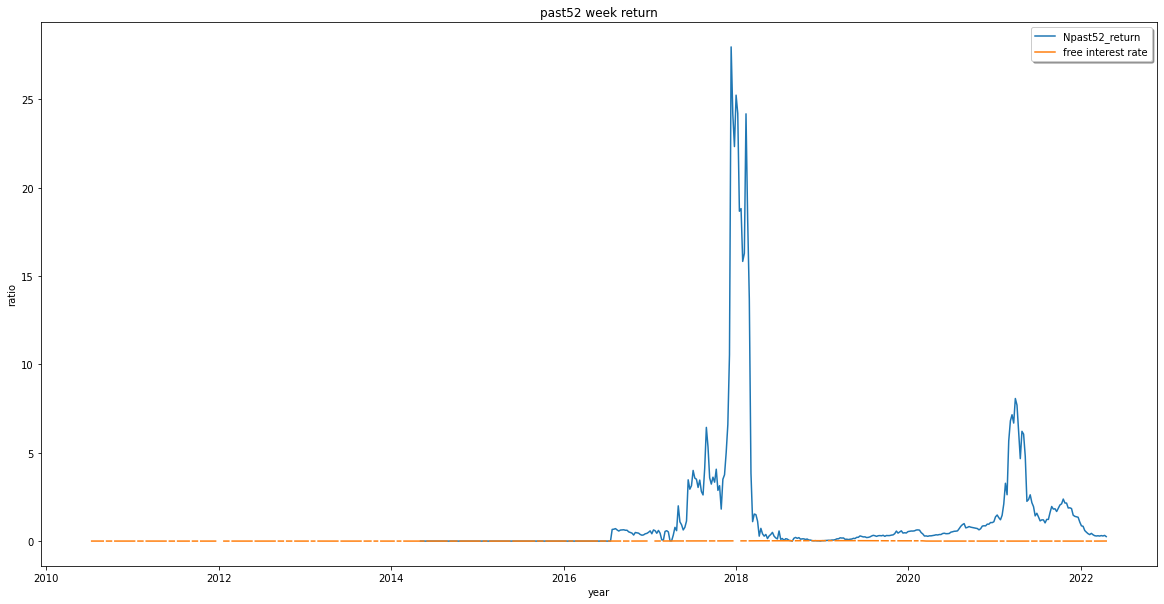

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
plt.plot(value_interate.Date, value_interate.ValFactor,label='Npast52_return')
plt.plot(value_interate.Date, value_interate.RiskFree,label='free interest rate')
plt.ylabel('ratio')
plt.xlabel('year')
plt.title('past52 week return')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.show()
